In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 1.1 Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [3]:
broken_df = pd.read_csv('../data/bikes.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 15: invalid continuation byte

In [4]:
broken_df.info()

NameError: name 'broken_df' is not defined

You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [10]:
fixed_df = pd.read_csv('../data/bikes.csv', 
                       encoding='latin1',
                       sep=';',
                       parse_dates=['Date'],
                       dayfirst=True,
                       index_col='Date'
                      )
fixed_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [12]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


In [13]:
cols=['Brébeuf (données non disponibles)',
      'St-Urbain (données non disponibles)']
fixed_df.drop(columns=cols,inplace=True)

In [14]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 7 columns):
Berri 1                  310 non-null int64
Côte-Sainte-Catherine    310 non-null int64
Maisonneuve 1            310 non-null int64
Maisonneuve 2            310 non-null int64
du Parc                  310 non-null int64
Pierre-Dupuy             310 non-null int64
Rachel1                  310 non-null int64
dtypes: int64(7)
memory usage: 19.4 KB


# 1.2 Selecting a column

In [15]:
fixed_df['Berri 1'].head()

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [31]:
fixed_df.Rachel1.head(10)

Date
2012-01-01     16
2012-01-02     43
2012-01-03     58
2012-01-04     61
2012-01-05     95
2012-01-06     75
2012-01-07     54
2012-01-08     63
2012-01-09    173
2012-01-10    241
Name: Rachel1, dtype: int64

# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

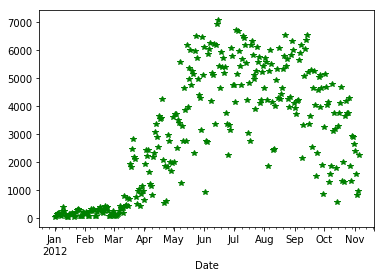

In [20]:
fixed_df['Berri 1'].plot(style='g*')

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

In [ ]:
fixed_df.plot(figsize=(15, 5),title="barely making any sense")

# 1.4 Putting all that together

Here's the code we needed to write do draw that graph, all together:

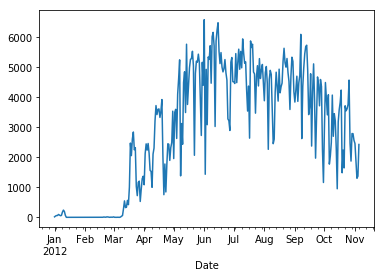

In [21]:
df = pd.read_csv('../data/bikes.csv', 
                 sep=';', 
                 encoding='latin1', 
                 parse_dates=['Date'], 
                 dayfirst=True, 
                 index_col='Date')
df['Rachel1'].plot(kind='line')

In [22]:
cols = ['Côte-Sainte-Catherine','Berri 1']
fixed_df[cols]

,Côte-Sainte-Catherine,Berri 1
Date,,
2012-01-01,0,35
2012-01-02,1,83
2012-01-03,2,135
2012-01-04,1,144
2012-01-05,2,197
2012-01-06,0,146
2012-01-07,2,98
2012-01-08,1,95
2012-01-09,2,244


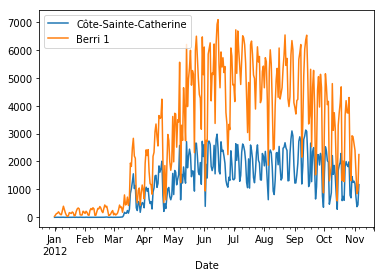

In [23]:
fixed_df[cols].plot()
plt.show()

In [44]:
fixed_df.describe()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,2985.048387,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871
std,2169.271062,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504
min,32.000000,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000
25%,596.000000,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000
50%,3128.000000,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000
75%,4973.250000,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000
max,7077.000000,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000
